In [69]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import f1_score,auc,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import train_test_split
#warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [70]:
X,y = make_classification(n_samples=1000,n_features=6,n_informative=1,n_redundant=1,n_repeated=1,n_clusters_per_class=1,weights=[0.9,0.1])

In [71]:
y.shape

(1000,)

In [72]:
df = pd.DataFrame(np.c_[X,y])
df.shape

(1000, 7)

In [73]:
df.head()

,0,1,2,3,4,5,6
0,-1.493451,-0.002123,-0.289229,0.040070,-0.183321,0.040070,0.0
1,-1.523816,0.136555,1.428437,0.040885,1.585035,0.040885,0.0
2,-2.606182,0.741833,0.770677,0.069925,0.001981,0.069925,0.0
3,-1.180609,0.476479,-0.424807,0.031676,0.514107,0.031676,0.0
4,-1.503435,-2.362502,1.642244,0.040338,-0.299726,0.040338,0.0


In [74]:
df[6].value_counts()

0.0    896
1.0    104
Name: 6, dtype: int64

In [75]:
clf = LogisticRegression() 

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [77]:
pipe1 = Pipeline([('scaler',MinMaxScaler()),('logit',LogisticRegression())])
pipe1.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logit', LogisticRegression())])

In [78]:
X_train[:5]

array([[-0.57488712,  0.90534962, -0.11588085,  0.01542457, -0.58719344,
         0.01542457],
       [-1.36693679,  0.10999437,  0.66738919,  0.03667574, -0.49667355,
         0.03667574],
       [-0.81863595, -1.02940145,  0.97691288,  0.0219645 ,  1.23219055,
         0.0219645 ],
       [-1.35379597,  0.35259957, -0.2929031 ,  0.03632317, -0.4726427 ,
         0.03632317],
       [-2.74450862, -1.45450789,  0.06794195,  0.07363683, -1.39908968,
         0.07363683]])

In [79]:
pipe2 = Pipeline([('standard',MinMaxScaler())],verbose=True)

In [80]:
X_test = pipe2.fit_transform(X_test)

[Pipeline] .......... (step 1 of 1) Processing standard, total=   0.0s


In [81]:
pred = pipe1.predict(X_test)

<AxesSubplot:>

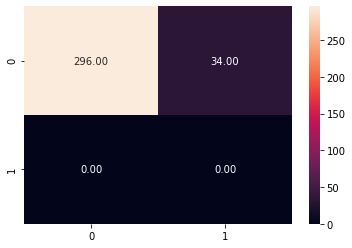

In [82]:
sns.heatmap(confusion_matrix(pred,Y_test),annot=True,fmt='.2f')

In [83]:
f1_score(Y_test,pred)

0.0

# with balanced weights

In [84]:
clf2 = LogisticRegression(class_weight='balanced')

In [85]:
pipe3 = Pipeline([('scaler',MinMaxScaler()),('logit',clf2)])
pipe3.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logit', LogisticRegression(class_weight='balanced'))])

In [86]:
X_train[:5]

array([[-0.57488712,  0.90534962, -0.11588085,  0.01542457, -0.58719344,
         0.01542457],
       [-1.36693679,  0.10999437,  0.66738919,  0.03667574, -0.49667355,
         0.03667574],
       [-0.81863595, -1.02940145,  0.97691288,  0.0219645 ,  1.23219055,
         0.0219645 ],
       [-1.35379597,  0.35259957, -0.2929031 ,  0.03632317, -0.4726427 ,
         0.03632317],
       [-2.74450862, -1.45450789,  0.06794195,  0.07363683, -1.39908968,
         0.07363683]])

In [87]:
pipe3.named_steps

{'scaler': MinMaxScaler(),
 'logit': LogisticRegression(class_weight='balanced')}

In [88]:
pipe3.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logit', LogisticRegression(class_weight='balanced'))])

In [89]:
pred2 = pipe3.predict(X_test)

<AxesSubplot:>

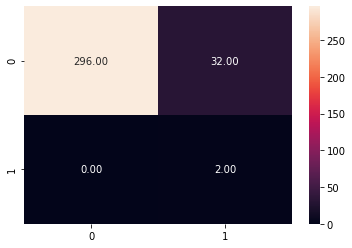

In [90]:
sns.heatmap(confusion_matrix(pred2,Y_test),annot=True,fmt='.2f')

In [91]:
f1_score(pred2,Y_test)

0.1111111111111111

# With Manual Weights

In [92]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=10,
    verbose=True
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters : {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


In [93]:
grid_result.cv_results_

{'mean_fit_time': array([0.00775151, 0.00791128, 0.00762432, 0.00892942, 0.00879264,
        0.00941997, 0.00698462, 0.0079634 , 0.00803299, 0.00749571,
        0.00459273, 0.00648808, 0.00824769, 0.00630574, 0.00913951,
        0.00903292, 0.0103663 , 0.00721154, 0.00936768, 0.00740924]),
 'std_fit_time': array([0.00185931, 0.00185715, 0.00147872, 0.00068329, 0.00095102,
        0.00136191, 0.00139139, 0.00087378, 0.00131666, 0.00128336,
        0.00159314, 0.00081962, 0.00182006, 0.00147186, 0.00181218,
        0.00169532, 0.00110985, 0.00039596, 0.0017522 , 0.00130125]),
 'mean_score_time': array([0.00200868, 0.00238433, 0.00252409, 0.00249619, 0.00231636,
        0.00259447, 0.00170767, 0.00188119, 0.00229411, 0.00198123,
        0.00138755, 0.00180604, 0.00198605, 0.00148628, 0.00220287,
        0.00247869, 0.00241299, 0.00169473, 0.00231376, 0.00179625]),
 'std_score_time': array([0.00080332, 0.00093954, 0.00068995, 0.00051314, 0.00064114,
        0.00068148, 0.00080558, 0.000680

In [94]:
grid_result.best_estimator_

LogisticRegression(class_weight={0: 0.5236842105263158, 1: 0.47631578947368425})

In [95]:
clf3 = grid_result.best_estimator_

In [96]:
X_train = MinMaxScaler().fit_transform(X_train)

In [97]:
clf3.fit(X_train,Y_train)

LogisticRegression(class_weight={0: 0.5236842105263158, 1: 0.47631578947368425})

In [98]:
pred3 = clf3.predict(X_test)

<AxesSubplot:>

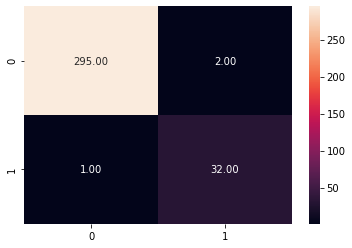

In [99]:
sns.heatmap(confusion_matrix(pred3,Y_test),annot=True,fmt='.2f')

In [100]:
f1_score(pred3,Y_test)

0.955223880597015